In [21]:
import numpy as np
from numpy.fft import fft, fftshift
import matplotlib.pyplot as plt

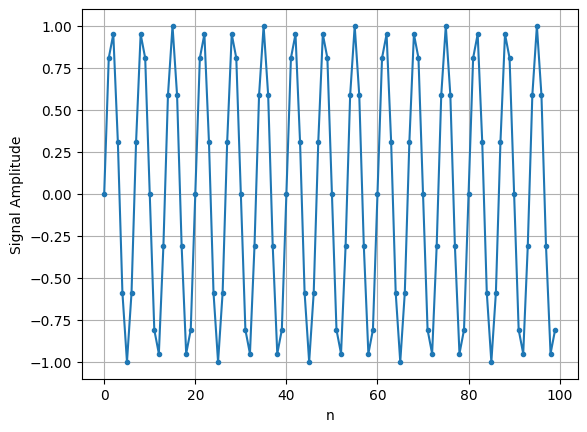

In [27]:
# make a sine wave at 0.15Hz, assumping 1Hz sample rate
Fs = 1 #Hz
f = 0.15
N = 100 # number of points to simulate
t = np.arange(N)
s = np.sin(f*2*np.pi*t)
fig = plt.plot(t,s,'.-')
plt.xlabel('n')
plt.ylabel('Signal Amplitude')
plt.grid(True)


In [28]:
# take the fft of signal s
S = fft(s)
S

array([ 5.11212812e-15+0.00000000e+00j, -2.17003711e-15-1.55431223e-15j,
        1.45559149e-14+2.15062627e-15j, -1.81572487e-14+3.88578059e-15j,
        6.58885969e-15+1.04006142e-16j, -2.31302708e-15+0.00000000e+00j,
        5.91911037e-15-2.11993094e-15j,  1.76912194e-14+8.41131861e-15j,
       -1.02820623e-14+1.20975021e-14j, -2.71871269e-14-1.76572662e-14j,
        5.28344134e-15+3.34230090e-15j,  2.74807191e-14-1.61574475e-14j,
        1.01406474e-14+1.43029952e-14j,  3.12762762e-15+1.26256653e-14j,
        1.33445101e-14+2.71293630e-14j, -8.58525403e-14-5.00000000e+01j,
       -5.11144821e-15-2.36595255e-14j,  2.47083979e-15-2.70668693e-14j,
        1.13371226e-14-1.54633274e-14j,  1.37523811e-14-7.16943339e-16j,
        1.00827927e-14-5.24058341e-15j,  3.57892570e-15+9.55542506e-16j,
        2.63496070e-14+1.59641284e-14j, -2.01027131e-14+1.64478302e-14j,
       -7.50257759e-15-4.50949613e-16j, -7.07681452e-15-1.06581410e-14j,
        1.47657179e-14-1.67196540e-15j, -9.39839896

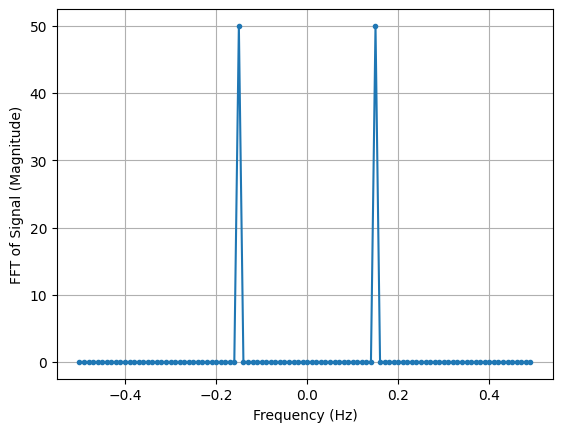

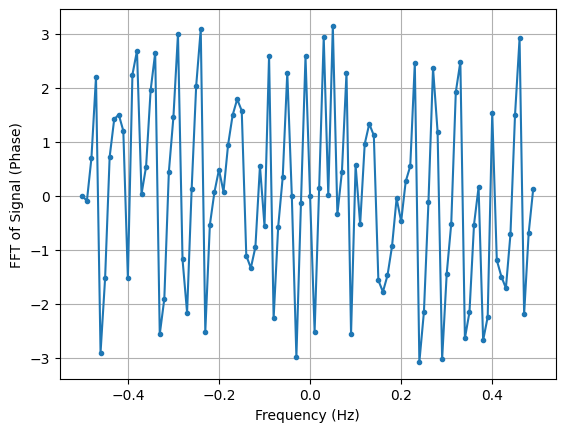

In [34]:
# plot the magnitude and phase
Fs = 1 #Hz
def phase_mag_plot(s,Fs=1):
    N = len(s)
    S = fftshift(fft(s))
    S_mag = np.abs(S)
    S_phase = np.angle(S)
    f = np.arange(Fs/-2,Fs/2,Fs/N)
    
    plt.figure(0)
    plt.grid(True)
    plt.plot(f,S_mag,'.-')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FFT of Signal (Magnitude)')
    
    plt.figure(1)
    plt.grid(True)
    plt.plot(f,S_phase,'.-')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FFT of Signal (Phase)')

    plt.show()

phase_mag_plot(s,Fs)



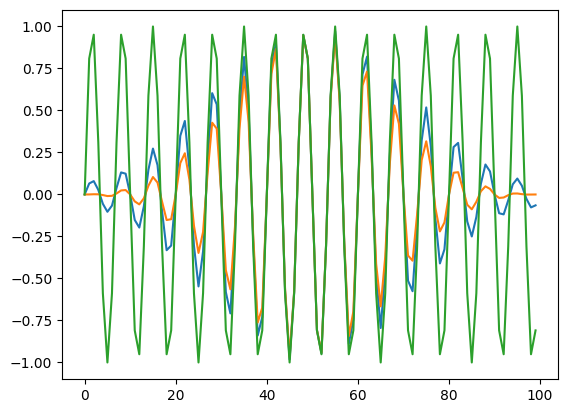

In [35]:
# see what windowing does
s_hamming = s * np.hamming(len(s))
s_blackman = s * np.blackman(len(s))

plt.plot(s_hamming)
plt.plot(s_blackman)
plt.plot(s)

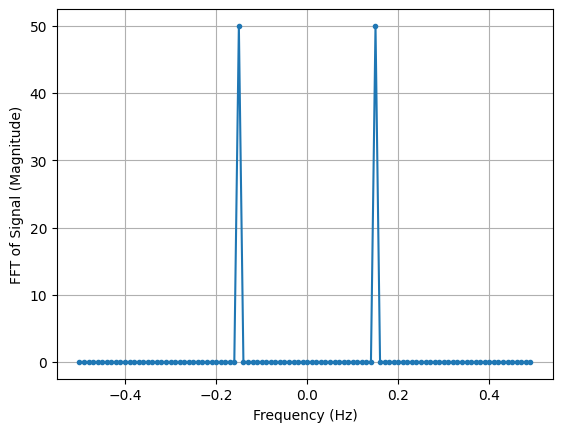

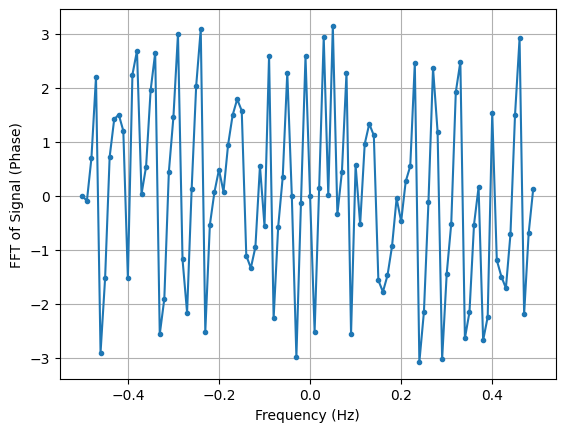

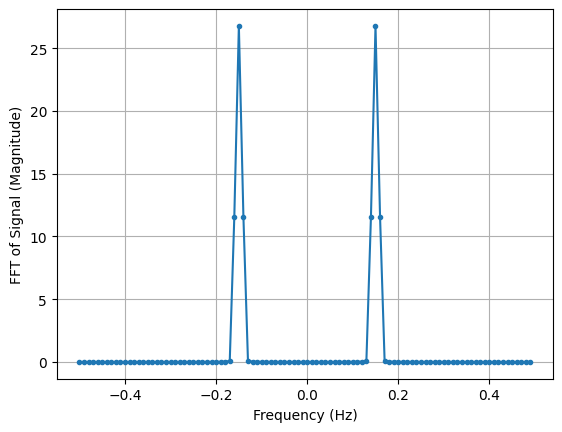

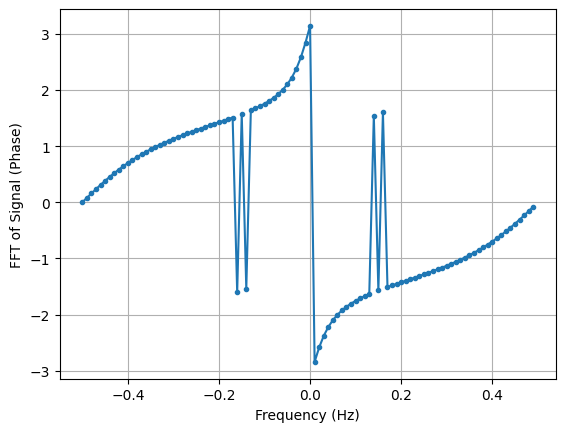

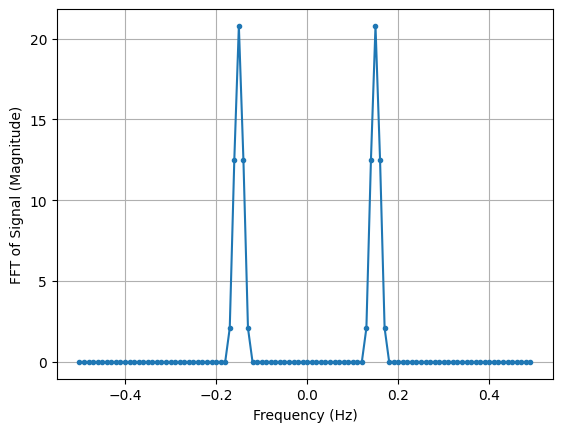

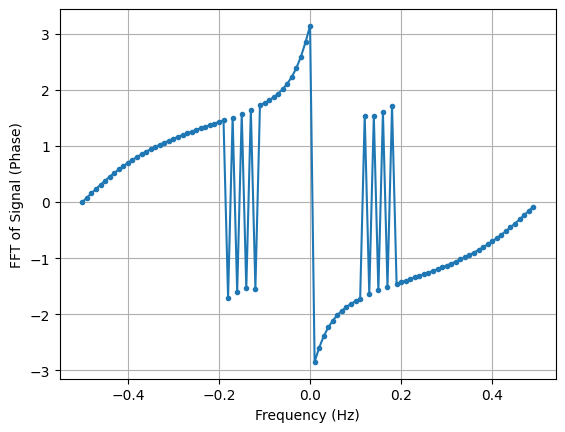

In [36]:
phase_mag_plot(s)
phase_mag_plot(s_hamming)
phase_mag_plot(s_blackman)

(0.0, 0.0002)

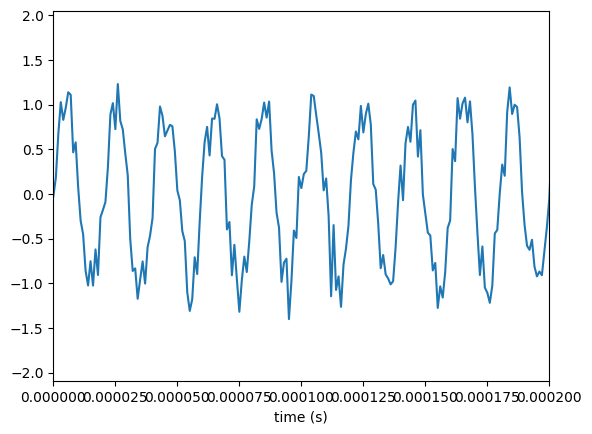

In [44]:
# example signal for waterfalling
sample_rate = 1e6 # samples / second; Hz
t = np.arange(1024 * 1000) / sample_rate # time vector
f = 50e3 # freq of tone (Hz)
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))
plt.plot(t,x)
plt.xlabel('time (s)')
plot_cycles = 200 / sample_rate
plt.xlim(0,plot_cycles)

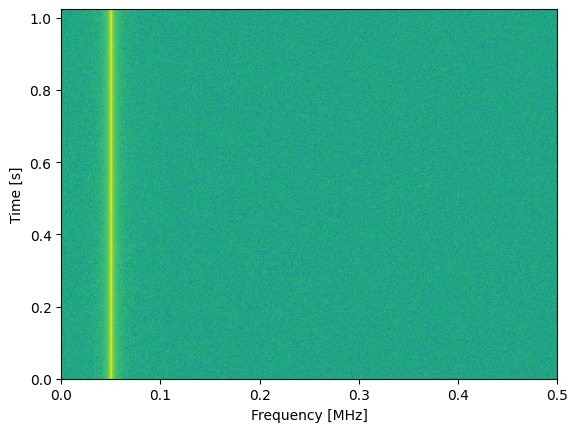

In [46]:
# this is straight from example text. it's yucky
fft_size = 1024
num_rows = int(np.floor(len(x)/fft_size))
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10 * np.log10(np.abs(fftshift(fft(x[i*fft_size:(i+1)*fft_size]))) ** 2)
spectrogram = spectrogram[:,fft_size//2:] # no negative freqs

plt.imshow(spectrogram,aspect='auto',extent=[0, sample_rate/2/1e6,0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()